In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

### Cargando datos de casas de Boston

In [5]:
data = pd.read_csv('../Boston-house-price-data.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


**Añadiendo correlacion entre columnas del frame**

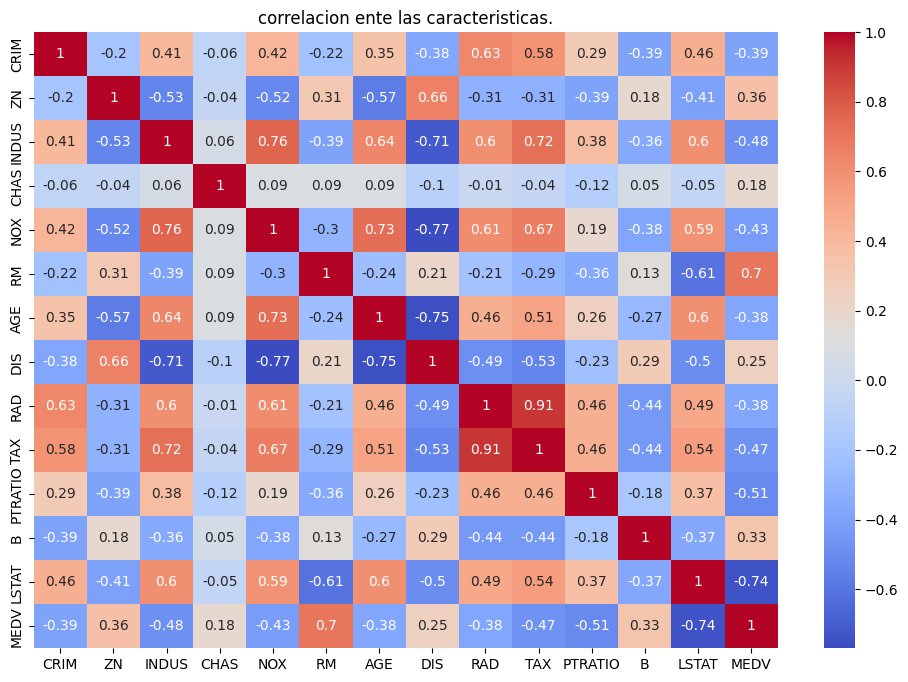

In [6]:
matriz_correlation = data.corr().round(2)
plt.figure(figsize=(12,8))
sns.heatmap(data=matriz_correlation, annot=True, cmap='coolwarm')
plt.title('correlacion ente las caracteristicas.')
plt.show()

**Separando variables X y Y para hacer pruebas.**

In [7]:
x  = data.drop('MEDV', axis=1)
y = data['MEDV']

In [8]:
scale = StandardScaler()
x_scale = scale.fit_transform(x)

**Conjunto de datos de netrenamiento y prueba**

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size=0.2, random_state=42)

**Crear Regresion**

In [12]:
modelo = LinearRegression()
modelo.fit(x_train, y_train)

LinearRegression()

**Predicciones de la regresion lineal**

In [13]:
y_pred = modelo.predict(x_test)
y_pred

array([28.99672362, 36.02556534, 14.81694405, 25.03197915, 18.76987992,
       23.25442929, 17.66253818, 14.34119   , 23.01320703, 20.63245597,
       24.90850512, 18.63883645, -6.08842184, 21.75834668, 19.23922576,
       26.19319733, 20.64773313,  5.79472718, 40.50033966, 17.61289074,
       27.24909479, 30.06625441, 11.34179277, 24.16077616, 17.86058499,
       15.83609765, 22.78148106, 14.57704449, 22.43626052, 19.19631835,
       22.43383455, 25.21979081, 25.93909562, 17.70162434, 16.76911711,
       16.95125411, 31.23340153, 20.13246729, 23.76579011, 24.6322925 ,
       13.94204955, 32.25576301, 42.67251161, 17.32745046, 27.27618614,
       16.99310991, 14.07009109, 25.90341861, 20.29485982, 29.95339638,
       21.28860173, 34.34451856, 16.04739105, 26.22562412, 39.53939798,
       22.57950697, 18.84531367, 32.72531661, 25.0673037 , 12.88628956,
       22.68221908, 30.48287757, 31.52626806, 15.90148607, 20.22094826,
       16.71089812, 20.52384893, 25.96356264, 30.61607978, 11.59

**Calcular errores**

In [14]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 24.291119474973527
R2 Score: 0.6687594935356318


### Guardar archivo con predicciones

In [15]:
joblib.dump(modelo, 'modelo_entrenado.pkl')

['modelo_entrenado.pkl']

**Cargar modelo**

In [17]:
charge_model = joblib.load('modelo_entrenado.pkl')

In [19]:
## Añadiendo nuevos datos

new_data = np.array([0.00632, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, 4.0900, 1.0, 296.0, 15.3, 396.90, 4.98]).reshape(1, -1)
new_data_scale = scale.transform(new_data)
predict = charge_model.predict(new_data_scale)
print(f'El precio de la casa es: {predict}')

El precio de la casa es: [29.95339638]


c:\Users\LINKZ\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
